# 🚗 Análisis Inicial de Siniestros Viales en CABA (2019–2023)

Sebastian Sanchez Bentolila  
📅 Fecha de inicio: Junio 2025  
🎓 Proyecto personal | Ciencia de Datos | CABA  

---

## 📌 Objetivo del cuaderno

Este notebook tiene como objetivo realizar una **exploración inicial** de los datasets de siniestros viales en la Ciudad Autónoma de Buenos Aires entre los años 2019 y 2023.  
Trabajaremos con dos datasets principales:

- `siniestros_viales_hechos.csv`: información general del hecho vial.
- `siniestros_viales_victimas.csv`: información detallada de las víctimas asociadas a cada hecho.

---

In [1]:
# Librerías para análisis de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones generales
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='deep')

In [15]:
# Carga de los datos
hechos_df = pd.read_csv("../data/siniestros_viales_hechos.csv", encoding='latin1', delimiter=';')
victimas_df = pd.read_csv("../data/siniestros_viales_victimas.csv", encoding='latin1', delimiter=';')

# Dimensiones
print("Hechos:", hechos_df.shape)
print("Víctimas:", victimas_df.shape)

Hechos: (44012, 23)
Víctimas: (50754, 10)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11964\3397127061.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  hechos_df = pd.read_csv("../data/siniestros_viales_hechos.csv", encoding='latin1', delimiter=';')


In [16]:
# Primeras filas del dataset de hechos
hechos_df.head()

,id_hecho,n_victimas,fecha,aaaa,mm,dd,hora,hh,direccion_normalizada,calle,altura,cruce,otra_direccion,comuna,tipo_de_calle,geocodificacion_caba,longitud,latitud,participantes,victima,contraparte,gravedad,tipo_de_dato
0,LC-2019-0008283,2,4/1/2019,2019,1,4,17:53:00,17,SD,NaN,NaN,NaN,aut. Dellepiane altura cruce con la calle Timo...,SD,SD,SD,SD,SD,AUTO-SD,AUTO,SD,SD,definitivo
1,LC-2019-0007634,1,4/1/2019,2019,1,4,14:50:00,14,SD,NaN,NaN,NaN,SD,SD,SD,SD,SD,SD,MOTO-SD,MOTO,SD,SD,definitivo
2,LC-2019-0008974,1,5/1/2019,2019,1,5,09:30:00,9,SD,NaN,NaN,NaN,SD,SD,SD,SD,SD,SD,BICICLETA-SD,BICICLETA,SD,SD,definitivo
3,LC-2019-0010983,2,6/1/2019,2019,1,6,22:20:00,22,SD,NaN,NaN,NaN,SD,SD,SD,SD,SD,SD,AUTO-SD,AUTO,SD,SD,definitivo
4,LC-2019-0011092,1,7/1/2019,2019,1,7,03:50:00,3,SD,NaN,NaN,NaN,SD,SD,SD,SD,SD,SD,PEATON-SD,PEATON,SD,SD,definitivo


In [17]:
# Primeras filas del dataset de víctimas
victimas_df.head()

,id_hecho,fecha,aaaa,victima,sexo_victima,edad_victima,gravedad,rol_victima,fecha_fallemiento,tipo_de_dato
0,LC-2019-0000053,2019-01-01,2019,sd,Varon,57,SD,SD,NaN,definitivo
1,LC-2019-0000063,2019-01-01,2019,sd,SD,SD,SD,SD,NaN,definitivo
2,LC-2019-0000079,2019-01-01,2019,sd,Varon,SD,SD,SD,NaN,definitivo
3,LC-2019-0000082,2019-01-01,2019,sd,Varon,45,SD,SD,NaN,definitivo
4,LC-2019-0000082,2019-01-01,2019,sd,Mujer,45,SD,SD,NaN,definitivo


In [18]:
# Info general
print("=== HECHOS ===")
hechos_df.info()

print("\n=== VÍCTIMAS ===")
victimas_df.info()

=== HECHOS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44012 entries, 0 to 44011
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id_hecho               44012 non-null  object
 1   n_victimas             44012 non-null  int64 
 2   fecha                  44012 non-null  object
 3   aaaa                   44012 non-null  int64 
 4   mm                     44012 non-null  int64 
 5   dd                     44012 non-null  int64 
 6   hora                   44012 non-null  object
 7   hh                     44012 non-null  object
 8   direccion_normalizada  44012 non-null  object
 9   calle                  33111 non-null  object
 10  altura                 32665 non-null  object
 11  cruce                  29509 non-null  object
 12  otra_direccion         44012 non-null  object
 13  comuna                 44012 non-null  object
 14  tipo_de_calle          44012 non-null  object
 15  geoc

In [19]:
# Porcentaje de valores nulos por columna
hechos_nulos = hechos_df.isnull().mean().sort_values(ascending=False)
victimas_nulos = victimas_df.isnull().mean().sort_values(ascending=False)

print("Valores nulos en HECHOS:")
print(hechos_nulos[hechos_nulos > 0])

print("\nValores nulos en VÍCTIMAS:")
print(victimas_nulos[victimas_nulos > 0])

Valores nulos en HECHOS:
cruce       0.329524
altura      0.257816
calle       0.247682
latitud     0.004908
longitud    0.004908
dtype: float64

Valores nulos en VÍCTIMAS:
fecha_fallemiento    0.990208
dtype: float64


In [20]:
# Convertir la fecha a datetime si existe
if 'fecha' in hechos_df.columns:
    hechos_df['fecha'] = pd.to_datetime(hechos_df['fecha'], errors='coerce')

    # Crear nuevas variables
    hechos_df['año'] = hechos_df['fecha'].dt.year
    hechos_df['mes'] = hechos_df['fecha'].dt.month
    hechos_df['día_semana'] = hechos_df['fecha'].dt.day_name()
    hechos_df['hora'] = hechos_df['fecha'].dt.hour

    hechos_df[['fecha', 'año', 'mes', 'día_semana', 'hora']].head()

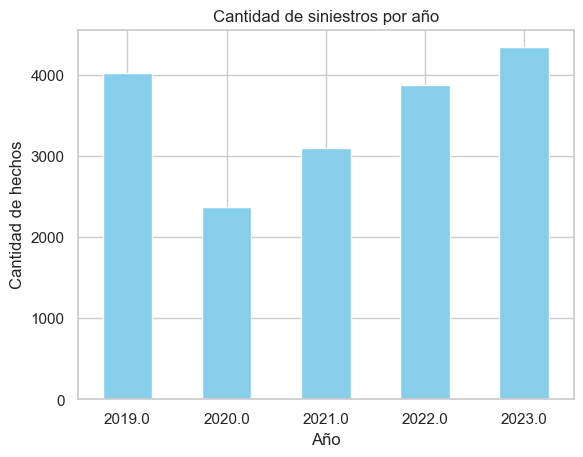

In [21]:
# Hechos por año
hechos_df['año'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Cantidad de siniestros por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de hechos')
plt.xticks(rotation=0)
plt.show()

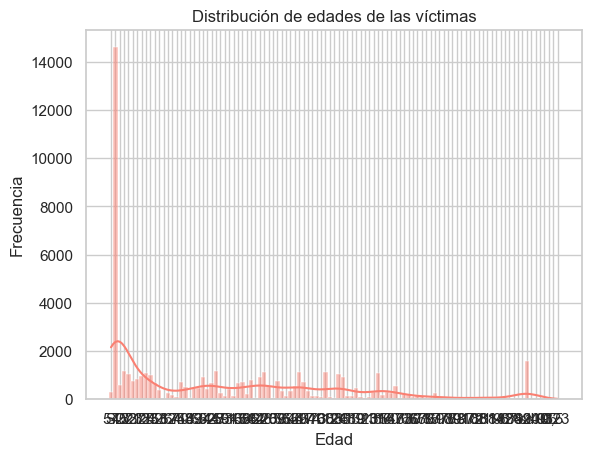

In [25]:
# Distribución por edad
sns.histplot(victimas_df['edad_victima'], bins=30, kde=True, color='salmon')
plt.title('Distribución de edades de las víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

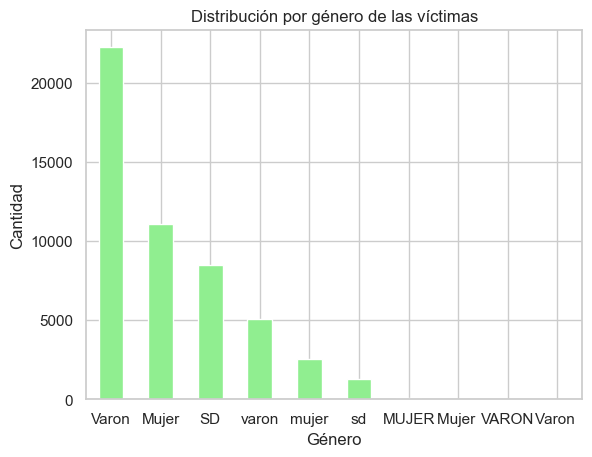

In [24]:
# Distribución por género
victimas_df['sexo_victima'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribución por género de las víctimas')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

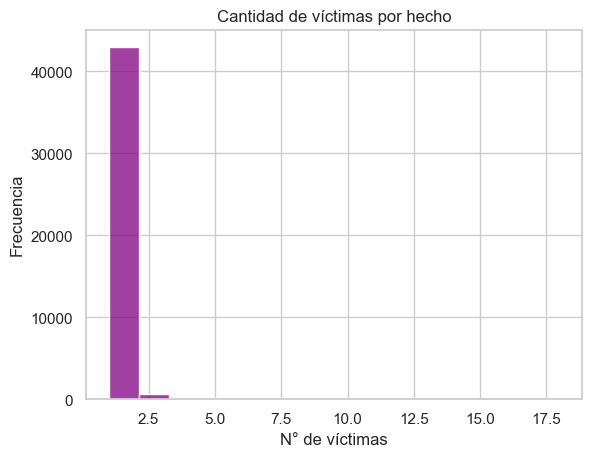

count    44012.000000
mean         1.153185
std          0.565237
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         18.000000
dtype: float64

In [26]:
# ¿Cuántas víctimas por hecho?
victimas_por_hecho = victimas_df.groupby('id_hecho').size()

sns.histplot(victimas_por_hecho, bins=15, color='purple')
plt.title('Cantidad de víctimas por hecho')
plt.xlabel('N° de víctimas')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticas rápidas
victimas_por_hecho.describe()

In [27]:
# Unión por ID del hecho
merged_df = pd.merge(victimas_df, hechos_df, on='id_hecho', how='left')

# Vista previa
merged_df.head()

,id_hecho,fecha_x,aaaa_x,victima_x,sexo_victima,edad_victima,gravedad_x,rol_victima,fecha_fallemiento,tipo_de_dato_x,n_victimas,fecha_y,aaaa_y,mm,dd,hora,hh,direccion_normalizada,calle,altura,cruce,otra_direccion,comuna,tipo_de_calle,geocodificacion_caba,longitud,latitud,participantes,victima_y,contraparte,gravedad_y,tipo_de_dato_y,año,mes,día_semana
0,LC-2019-0000053,2019-01-01,2019,sd,Varon,57,SD,SD,NaN,definitivo,1,2019-01-01,2019,1,1,0.0,1,SD,NaN,NaN,NaN,"Autopista Presidente Héctor J. Cámpora y Roca,...",8,AUTOPISTA,Point (101813.84712503915943671 95578.55507230...,-5.844.351,-34.669.125,AUTO-SD,AUTO,SD,SD,definitivo,2019.0,1.0,Tuesday
1,LC-2019-0000063,2019-01-01,2019,sd,SD,SD,SD,SD,NaN,definitivo,1,2019-01-01,2019,1,1,0.0,2,SD,NaN,NaN,NaN,"Barros Pazos, Jose y Larraya 0, Barrio: Villa ...",8,SD,Point (99538.58660300650808495 94643.418717990...,-58.468.335,-34.677.556,SD-SD,SD,SD,SD,definitivo,2019.0,1.0,Tuesday
2,LC-2019-0000079,2019-01-01,2019,sd,Varon,SD,SD,SD,NaN,definitivo,1,2019-01-01,2019,1,1,0.0,2,SD,NaN,NaN,NaN,"Torres Y Tenorio, Pres. y Riestra Av. 0, Barri...",7,SD,Point (102372.16830963784013875 97994.13750300...,-58.437.425,-34.647.349,PEATON-SD,PEATON,SD,SD,definitivo,2019.0,1.0,Tuesday
3,LC-2019-0000082,2019-01-01,2019,sd,Varon,45,SD,SD,NaN,definitivo,4,2019-01-01,2019,1,1,0.0,4,SD,NaN,NaN,NaN,"Corrientes Av. y Uriburu Jose E., Pres. 0, Bar...",3,SD,Point (105968.98286849579017144 102737.1734686...,-58.398.225,-34.604.579,AUTO-SD,AUTO,SD,SD,definitivo,2019.0,1.0,Tuesday
4,LC-2019-0000082,2019-01-01,2019,sd,Mujer,45,SD,SD,NaN,definitivo,4,2019-01-01,2019,1,1,0.0,4,SD,NaN,NaN,NaN,"Corrientes Av. y Uriburu Jose E., Pres. 0, Bar...",3,SD,Point (105968.98286849579017144 102737.1734686...,-58.398.225,-34.604.579,AUTO-SD,AUTO,SD,SD,definitivo,2019.0,1.0,Tuesday


- Se cargaron correctamente los datasets de hechos y víctimas.
- Se observaron registros desde 2019 hasta 2023.
- El dataset incluye variables temporales, espaciales y de gravedad.
- Hay presencia de valores faltantes que se deberán tratar.
- La mayoría de los hechos tiene 1 o 2 víctimas, pero hay casos con más.
- La distribución etaria y de género muestra tendencias que se pueden analizar más adelante.

En los próximos notebooks realizaremos un análisis más profundo:
- Visualizaciones detalladas
- Análisis geoespacial
- Construcción de modelos predictivos